<a href="https://colab.research.google.com/github/Rahul-Gadadhar/OIBSIP/blob/master/Task%203%20-%20Email%20Spam%20Detection/Task_3_Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 3** : Email Spam Detection With Machine Learning

by Rahul Gadadhar

---


**Importing Necessary Python Libraries :**

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

**Downloading NLTK stopwords :**

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Loading the dataset :**

In [51]:
df = pd.read_csv("/content/spam.csv", encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**Drop unnecessary columns :**

In [52]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**Remove duplicate rows :**

In [53]:
df.drop_duplicates(inplace=True)

**Rename columns for clarity :**

In [54]:
df.rename(columns={'v1': 'Label', 'v2': 'Text'}, inplace=True)
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**Displaying Information about the Dataset :**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5169 non-null   object
 1   Text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


**Displaying the statistics of the Dataset :**

In [56]:
df.describe()

,Label,Text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


**Displaying the first 10 rows of the dataset :**

In [57]:
df.head(10)

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


**Plotting distribution of spam vs ham :**

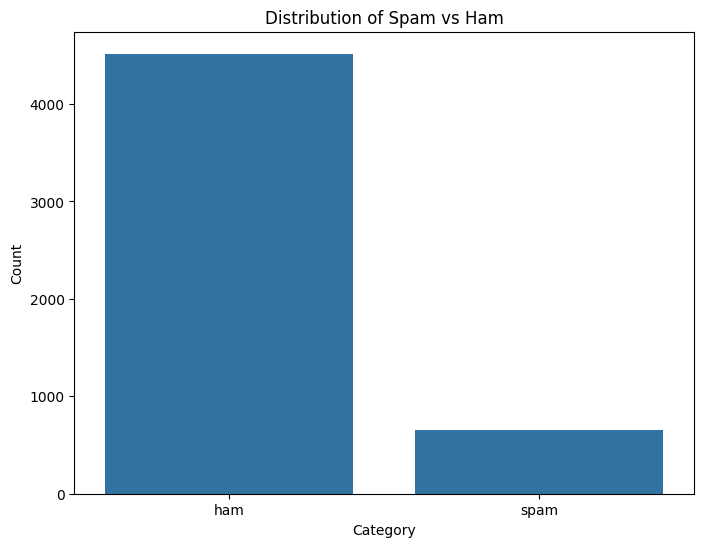

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Label')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Spam vs Ham')
plt.show()

**Mapping labels to binary values :**

In [59]:
df['Label'] = df['Label'].map({'spam': 0, 'ham': 1})

**Splitting data into train and test sets :**

In [60]:
X=df['Text']
y=df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Initializing TF-IDF vectorizer :**

In [61]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

**Transforming training and test data :**

In [62]:
X_train_features = tfidf_vectorizer.fit_transform(X_train)
X_test_features = tfidf_vectorizer.transform(X_test)

**Initializing and Training a Logistic Regression model :**

In [63]:
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

**Predict on training and test data :**

In [64]:
train_pred = model.predict(X_train_features)
test_pred = model.predict(X_test_features)

**Calculating Accuracy :**

In [65]:
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

In [66]:
print('Accuracy on Training data:\n {:.2f}%'.format(train_accuracy * 100))
print('Accuracy on Test data:\n {:.2f}%'.format(test_accuracy * 100))

Accuracy on Training data:
 96.13%
Accuracy on Test data:
 96.42%


**Plotting confusion matrix :**

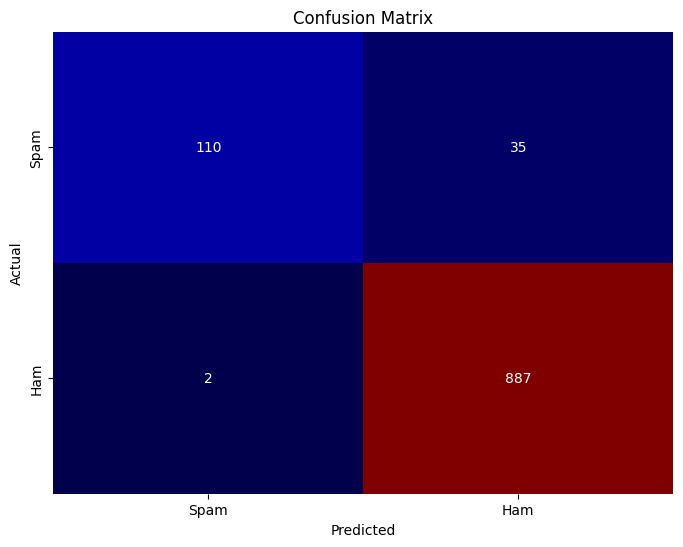

In [67]:
conf_matrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="seismic", cbar=False, xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Displaying classification report :**

In [68]:
classification_rep = classification_report(y_test, test_pred, target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       0.98      0.76      0.86       145
         Ham       0.96      1.00      0.98       889

    accuracy                           0.96      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034



**Calculate additional metrics :**

In [69]:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [70]:
print("Accuracy:\n {:.2f}".format(accuracy))
print("Precision:\n {:.2f}".format(precision))
print("Recall:\n {:.2f}".format(recall))

Accuracy:
 0.96
Precision:
 0.96
Recall:
 1.00


**Test with custom email samples :**

In [71]:
sample_emails = [
    "Hi there, I wanted to follow up on our conversation from last week regarding the project timeline. Please let me know if you need any further information.",
    "URGENT: Your account needs immediate attention. Please update your payment information to avoid suspension.",
    "Hello, I'm writing to inform you about the latest updates to our company's policies. Please review the attached document for more details.",
    "Claim your free trial now and experience the benefits of our premium service!",
    "Hey, just wanted to check in and see if you received my previous email. Looking forward to hearing from you soon.",
    "You're a winner! You've been selected for a special prize. Click the link to claim it now"
]

In [72]:
for i, email in enumerate(sample_emails, 1):
    input_data_features = tfidf_vectorizer.transform([email])
    prediction = model.predict(input_data_features)
    print('Email {}: "{}"'.format(i, email))
    if prediction[0] == 1:
        print("Prediction: Ham Mail\n")
    else:
        print("Prediction: Spam Mail\n")

Email 1: "Hi there, I wanted to follow up on our conversation from last week regarding the project timeline. Please let me know if you need any further information."
Prediction: Ham Mail

Email 2: "URGENT: Your account needs immediate attention. Please update your payment information to avoid suspension."
Prediction: Ham Mail

Email 3: "Hello, I'm writing to inform you about the latest updates to our company's policies. Please review the attached document for more details."
Prediction: Ham Mail

Email 4: "Claim your free trial now and experience the benefits of our premium service!"
Prediction: Spam Mail

Email 5: "Hey, just wanted to check in and see if you received my previous email. Looking forward to hearing from you soon."
Prediction: Ham Mail

Email 6: "You're a winner! You've been selected for a special prize. Click the link to claim it now"
Prediction: Spam Mail

